# Fake Job Posting Machine Learning Project 

## Framing the problem

The aim of this project is to predict whether any given job posting is fake or real, given data such as telecommuting, experience, education, employment type, industry, job function, etc. Success is measured by the accuracy percentage of the model that perdict whether a job posting is fake or not.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Import dataset
df = pd.read_csv('fake_job_postings.csv')

# Counting rows, columns
print(df.shape)

# View first lines of data
df.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploring the data

In [3]:
# check out datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

0    17014
1      866
Name: fraudulent, dtype: int64


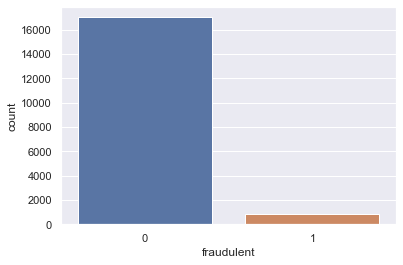

In [4]:
# build a bar plot of job posting fradulancy
sns.countplot(x='fraudulent', data=df)
# number of real & fake postings
print(df["fraudulent"].value_counts())

Investigating “fraudulent” column shows there are 17014 real and 866 fake postings (less than 5%) in the whole dataset.

### Exploring binary features & fraudulency

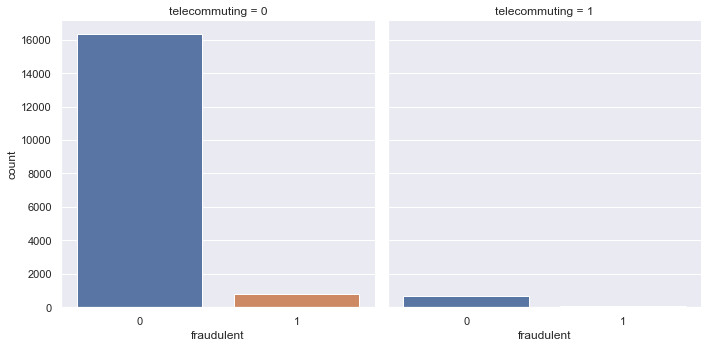

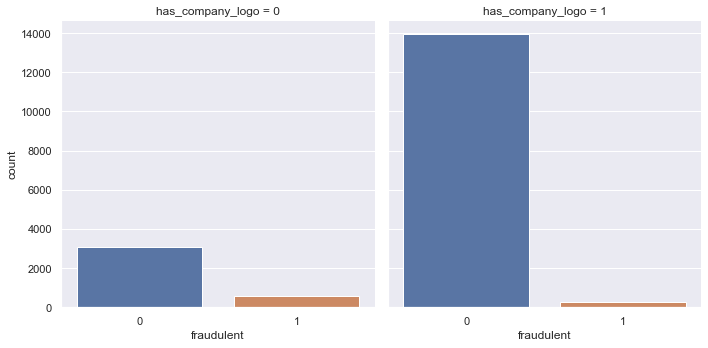

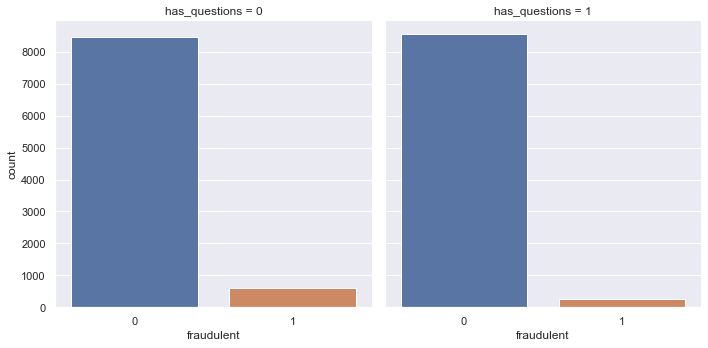

In [5]:
sns.catplot(x='fraudulent', col='telecommuting', kind='count', data=df)
sns.catplot(x='fraudulent', col='has_company_logo', kind='count', data=df)
sns.catplot(x='fraudulent', col='has_questions', kind='count', data=df)

### Exploring non-binary features

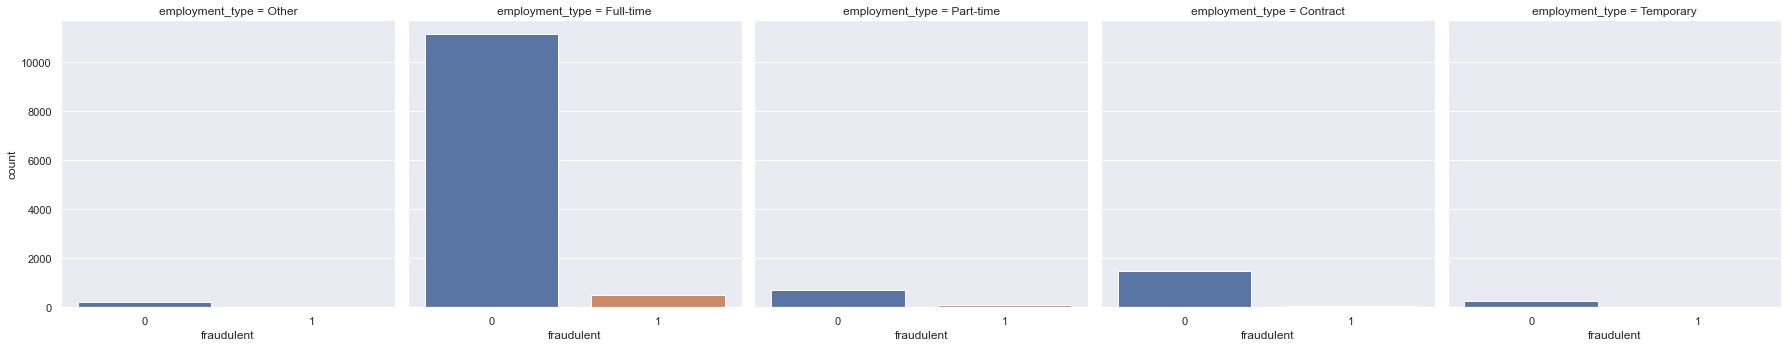

In [6]:
sns.catplot(x='fraudulent', col='employment_type', kind='count', data=df)

Most postings are 'Full-time' employment.

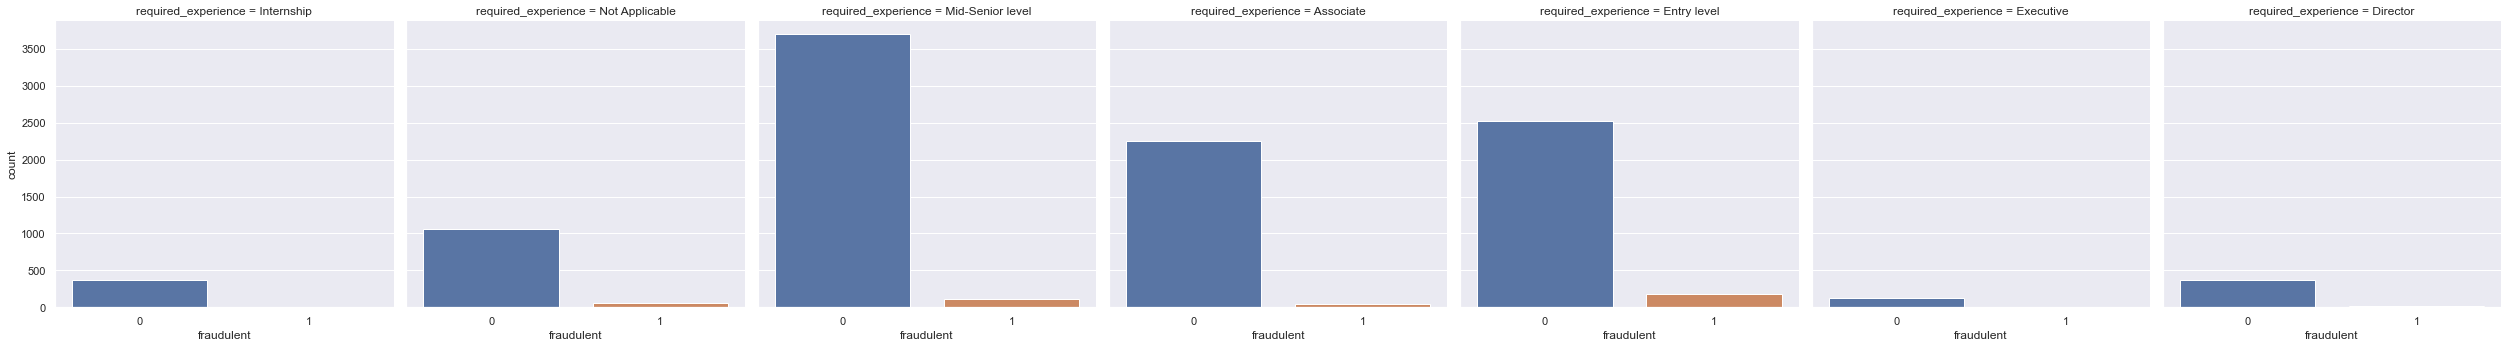

In [7]:
sns.catplot(x='fraudulent', col='required_experience', kind='count', data=df)

Most postings required 'Mid-Senior level' experience.

## Wrangle data

In [8]:
# Filling missing departments with the mode
df['department'] = df['department'].fillna(df['department'].mode()[0])

In [9]:
# Dropping unused columns
df_cp = df.drop(["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"], axis=1)

In [10]:
# Store target variable of data in a safe place
y = df.fraudulent

# Dropping target variable from dataset
X = df_cp.drop('fraudulent', axis=1)

Considering columns types and their data not all normal wrangling methods works on this database. However, more advanced textual techniques might work better with this specific dataset which were considered outside of the scope of this project.

In [11]:
X.isnull().sum()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
dtype: int64

## Identify promising models

In [12]:
#splitting the data into train and test with 33% reserved for testing and 67% for training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=13)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11979, 4), (5901, 4), (11979,), (5901,))

### Training Decision Tree model

In [13]:
# Instantiate Decision Tree model
clf = tree.DecisionTreeClassifier(max_depth=3)

# Train our model using the training sets
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = clf.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_pred_DT)
print('Mean squared error:', round(mse,2))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_DT)
print('R-Squared:', round(r2,2))

Mean squared error: 0.03
R-Squared: 0.28


### Training Random Forest model

In [14]:
# Create Random Forest object
model = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_RFM = model.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_pred_RFM)
print('Mean squared error:', round(mse,2))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_RFM)
print('R-Squared:', round(r2,2))

Mean squared error: 0.03
R-Squared: 0.29


### Training XGBoost model

In [15]:
# Create XGBoost object
XGB = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

# Train the model using the training sets
XGB.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_XGB = XGB.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_pred_XGB)
print('Mean squared error:', round(mse,2))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_XGB)
print('R-Squared:', round(r2,2))

Mean squared error: 0.03
R-Squared: 0.31


## Tuning RFM model

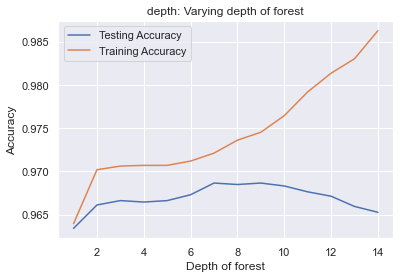

In [20]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a depth for depth of forest
    depth = RandomForestClassifier(max_depth=k)

    # Fit the depth to the training data
    depth.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = depth.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = depth.score(X_test, y_test)

# Generate plot
plt.title('depth: Varying depth of forest')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of forest')
plt.ylabel('Accuracy')
plt.show()

This graph shows after depth of 8 the testing accuracy saturates so hyperparameter (max_depth=8) is actually the best value for the depth of the forest.

### Tuned Random Forest model

In [17]:
# Create Random Forest object
tuned = RandomForestClassifier(n_estimators=100, max_depth=8, bootstrap=True)

# Train the model using the training sets
tuned.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_TM = tuned.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_pred_TM)
print('Mean squared error:', round(mse,2))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_TM)
print('R-Squared:', round(r2,2))

Mean squared error: 0.03
R-Squared: 0.33
